In [1]:
from github import plot


import time
import json
import requests
import numpy as np
import pandas as pd

import requests
from requests.auth import HTTPBasicAuth

from github.config import Config

import pandas as pd

In [2]:
conf = Config()

In [3]:
user_df = pd.read_csv(conf.getUserPath())
repos_df = pd.read_csv(conf.getRepoPath())
commits_df = pd.read_csv(conf.getCommitPath())
lang_df = pd.read_csv(conf.getLanguagePath())

## Analisys

In [4]:
repos = repos_df
commits = commits_df
repos.head()

,Id,Name,Description,Created on,Updated on,Owner,License,Includes wiki,Forks count,Issues count,Stars count,Watchers count,Repo URL,Commits URL,Languages URL
0,50627775,alf-db-constraint,Database constraint to Alfresco Document Type,2016-01-29T01:27:23Z,2017-08-09T11:32:25Z,gsdenys,GNU Lesser General Public License v2.1,True,0,0,4,4,https://api.github.com/repos/gsdenys/alf-db-co...,https://api.github.com/repos/gsdenys/alf-db-co...,https://api.github.com/repos/gsdenys/alf-db-co...
1,39864719,alfresco-bulk-export,Automatically exported from code.google.com/p/...,2015-07-29T00:36:35Z,2019-09-19T11:17:25Z,gsdenys,GNU Lesser General Public License v3.0,False,33,17,11,11,https://api.github.com/repos/gsdenys/alfresco-...,https://api.github.com/repos/gsdenys/alfresco-...,https://api.github.com/repos/gsdenys/alfresco-...
2,197203698,amqp-client,Lua Client for AMQP,2019-07-16T13:52:44Z,2020-09-27T09:41:13Z,gsdenys,Apache License 2.0,True,7,6,5,5,https://api.github.com/repos/gsdenys/amqp-client,https://api.github.com/repos/gsdenys/amqp-clie...,https://api.github.com/repos/gsdenys/amqp-clie...
3,241175035,bpm-engine,Event drive engine for BPMN,2020-02-17T18:07:22Z,2020-02-17T18:23:29Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/bpm-engine,https://api.github.com/repos/gsdenys/bpm-engin...,https://api.github.com/repos/gsdenys/bpm-engin...
4,27539722,cmis-java-sample,Breve exemplo de ações usando OpenCMIS,2014-12-04T12:35:44Z,2015-03-23T14:09:08Z,gsdenys,NaN,True,0,0,1,1,https://api.github.com/repos/gsdenys/cmis-java...,https://api.github.com/repos/gsdenys/cmis-java...,https://api.github.com/repos/gsdenys/cmis-java...


In [5]:
plot.show(repos, commits)

Total repos till date: 36
Total commits till date: 287
Total starts till date: 30
Total Watchers till date: 30


In [6]:
commits_count = plot.count_commit(repos, commits)
repos = pd.merge(repos, commits_count, on = 'Id')

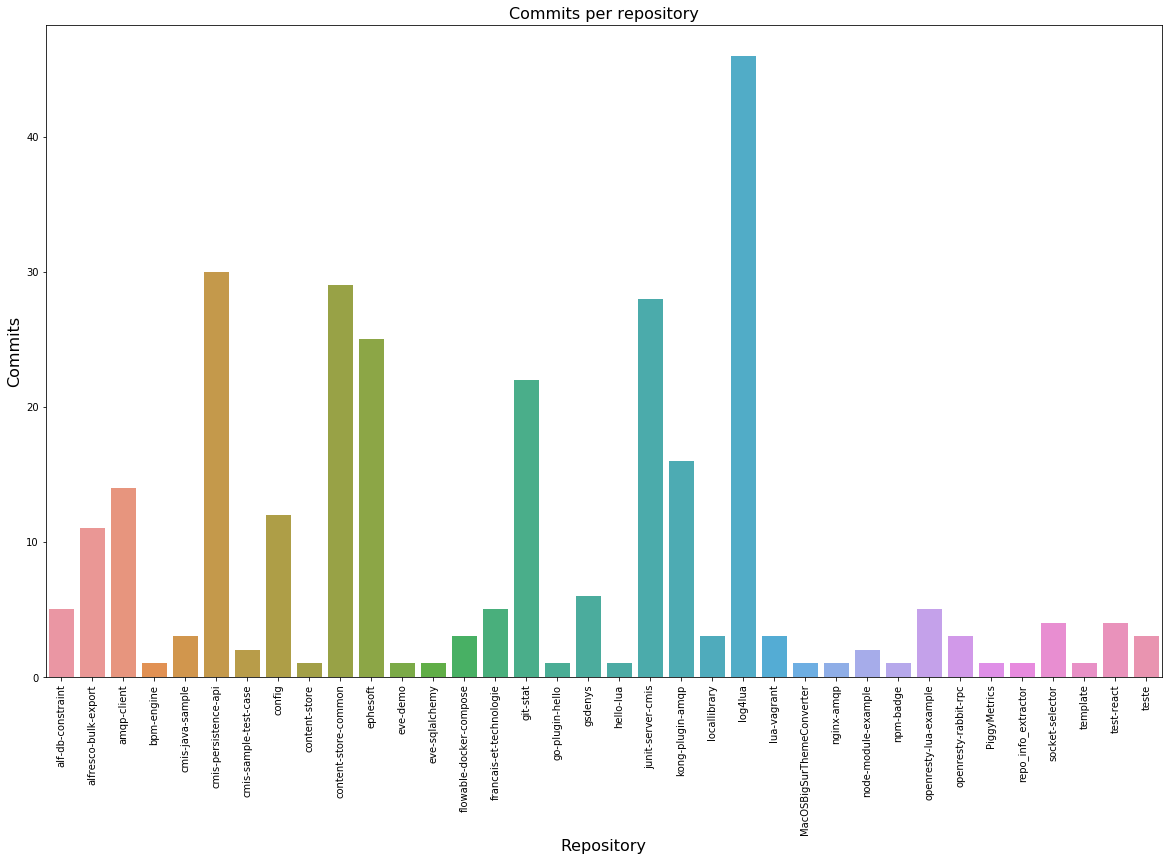

In [7]:
plot.draw(repos['Name'], repos['Commits count'], "Repository", "Commits", "Commits per repository")

In [8]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

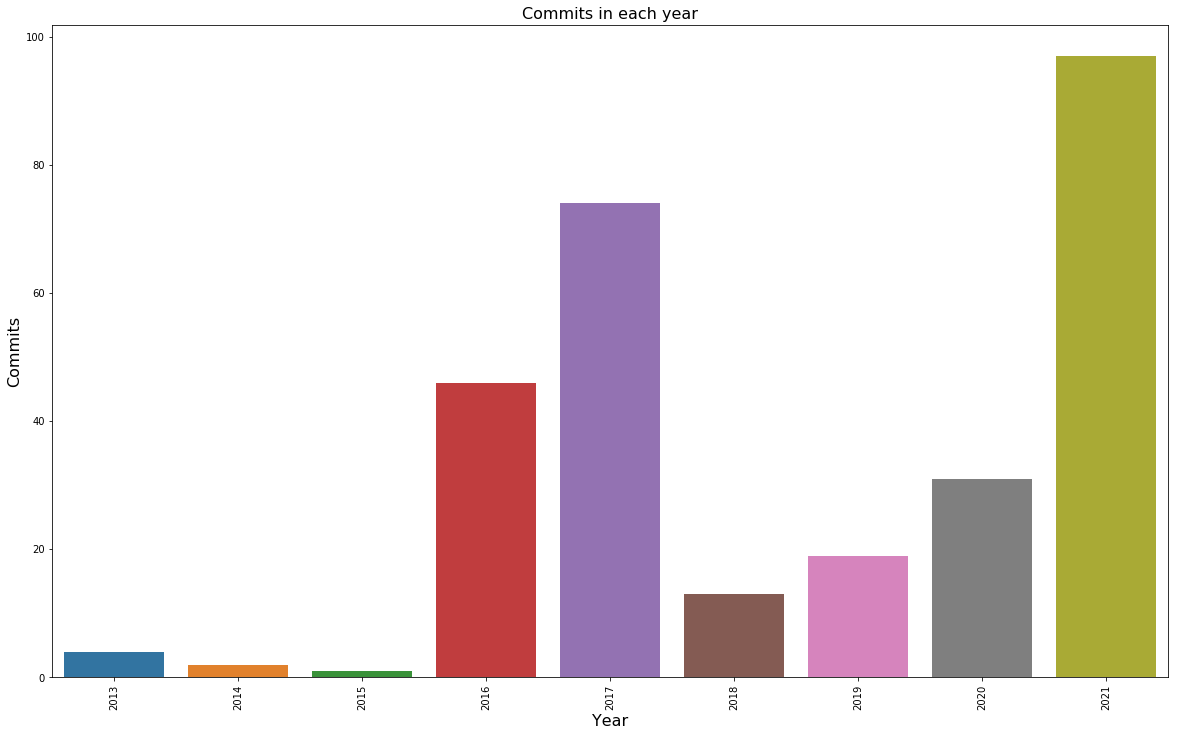

In [9]:
plot.draw(yearly_stats.index, yearly_stats.values, "Year", "Commits", "Commits in each year")

In [10]:
yearly_stats = yearly_stats.reset_index()
row_max = yearly_stats['Commit Id'].argmax()
year_max = yearly_stats['Year'][row_max]


commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == year_max].groupby('Month').count()['Commit Id']

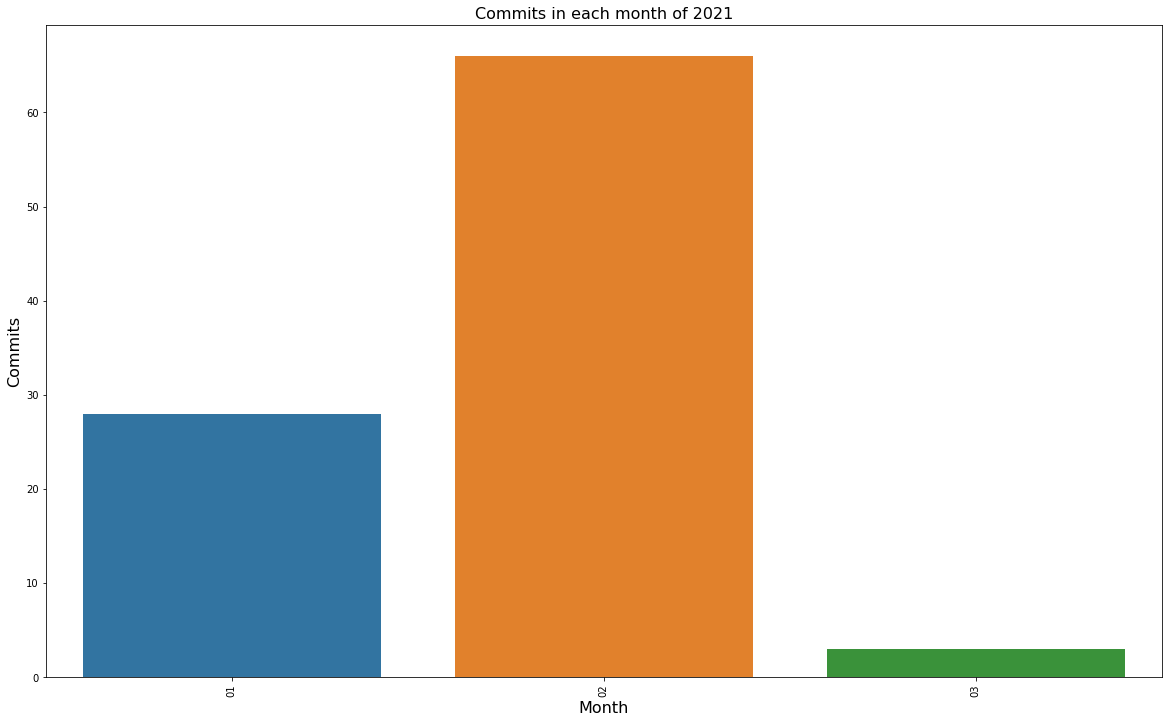

In [11]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'Autgust', '09': 'September','10': 'October', '11':'November', '12': 'Dezember'}
    
plot.draw(
    monthly_stats.index, 
    monthly_stats.values, 
    "Month", 
    "Commits", 
    "Commits in each month of " + year_max
)


In [12]:
monthly_stats = monthly_stats.reset_index()
row_max = monthly_stats['Commit Id'].argmax()
month_max = monthly_stats['Month'][row_max]

commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == year_max)
                       & (commits['Month'] == month_max)]['Date only'].value_counts().sort_index()

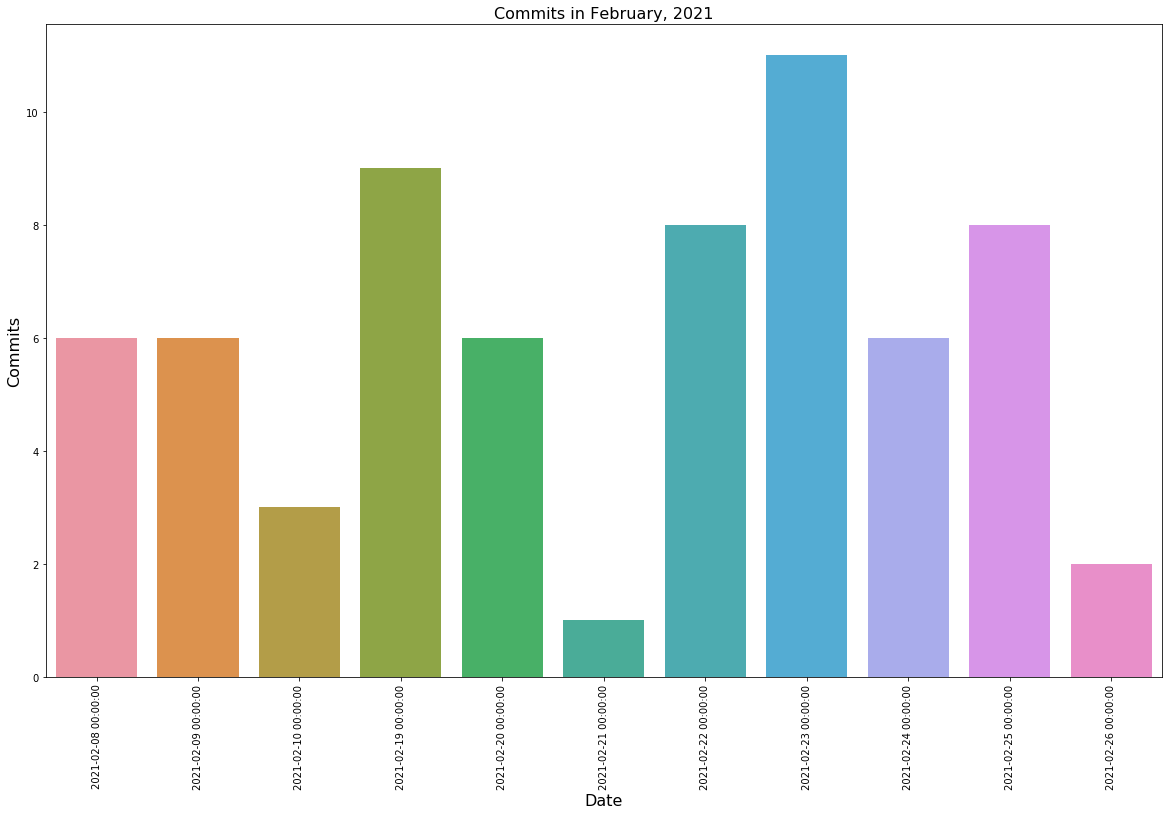

In [13]:
plot.draw(
    commit_stats.index, 
    commit_stats.values, 
    "Date", 
    "Commits", 
    "Commits in "+ month_mapper[month_max] +", " + year_max
)

## Language

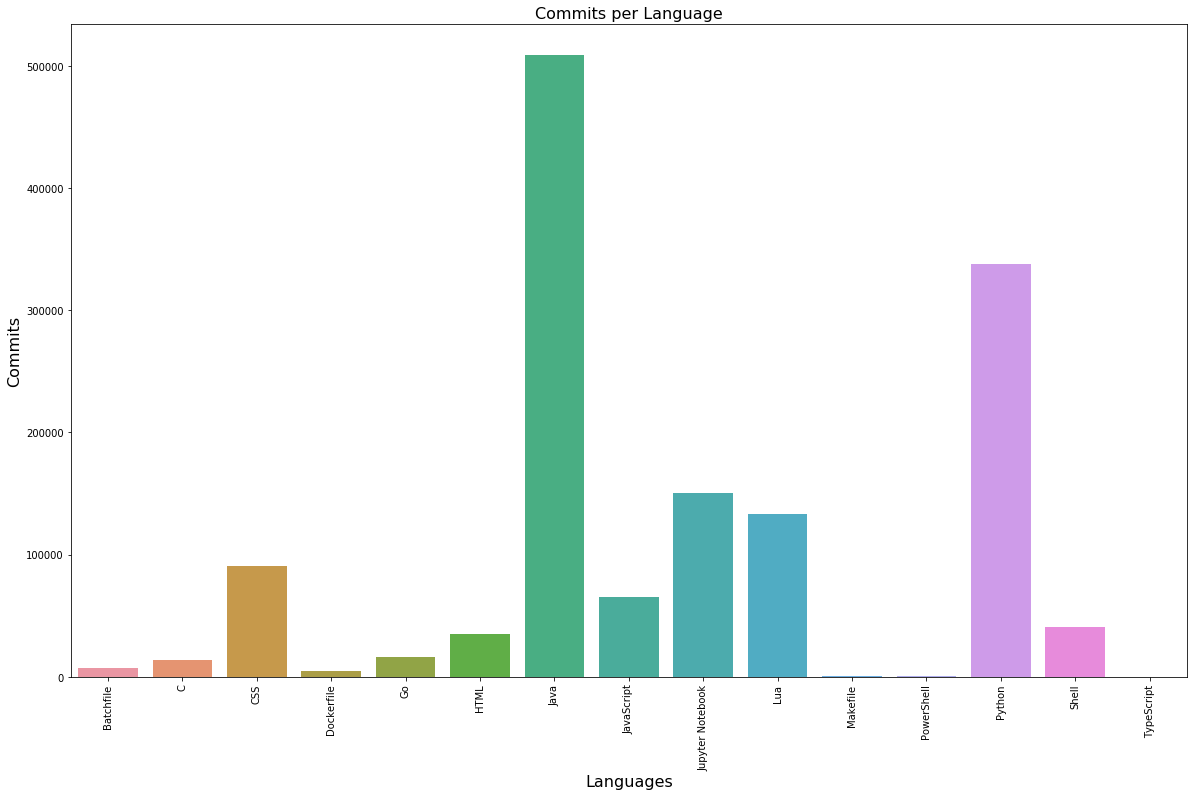

In [14]:
l = lang_df.groupby("Language").sum()

plot.draw(
    l["Repo Id"].index, 
    l["Size"].values, 
    "Languages", 
    "Commits", 
    "Commits per Language"
)